Alya Safadella Putri Akca\
221910892\
3SI1\
Tugas 9 APG

In [30]:
library(factoextra)
library(dendextend)
library(FactoClass)
library(openxlsx)

In [3]:
D <- matrix(c(0, 9, 3, 6, 11, 9, 0, 7, 5, 10, 3, 7, 0, 9, 2, 6, 5, 9, 0, 8, 11, 10, 2, 8, 0),
            nrow = 5, ncol = 5)
as.dist(D)

   1  2  3  4
2  9         
3  3  7      
4  6  5  9   
5 11 10  2  8

Klasterisasi $average \space linkage$ menggunakan rataan dari jarak antara titik yang akan dikelompokan, sesuai dengan formula dari Johnson:
$$d_{(UV)W} = \displaystyle \frac{\sum_{i}\sum_{j} d_{ij}}{N_{(UV)}N_{W}}$$

dengan menggunakan formula di atas, proses pengklasterisasian adalah sebagai berikut:

- deteksi terlebih dahulu, dari matriks distance yang telah diberikan, mana variabel yang memiliki jarak paling kecil, dalam hal ini adalah `jarak antara variabel 3 dan 5` (distance nya sebesar 2). Dengan begitu, kita mendapatkan 1 kelompok data yang baru, yaitu kelompok variabel 3 dan 5

- lakukan penghitungan ulang jarak antara titik-titik selain 3 dan 5 dengan kelompok data baru yang telah kita peroleh sebelumnya (kelompok data 3 dan 5). Berikut perhitungannya:


In [4]:
d_35_to_1 <- (D[3, 1] + D[5, 1])/2
d_35_to_2 <- (D[3, 2] + D[5, 2])/2
d_35_to_4 <- (D[3, 4] + D[5, 4])/2

d_35_to_1
d_35_to_2
d_35_to_4

[1] 7

[1] 8.5

[1] 8.5

dari hasi lperhitungan di atas, diperoleh nilai $d_{(35)1} = 7$, $d_{(35)2} = 8.5$, $d_{(35)3} = 8.5$, sehingga didapatkan matriks baru:

In [5]:
D_35 <- matrix(c(0, 9, 6, 7, 9, 0, 5, 8.5, 6, 5, 0, 8.5, 7, 8.5, 8.5, 0), 
               nrow = 4, ncol = 4)
colnames(D_35) <- c("1", "2", "4", "3&5")
rownames(D_35) <- c("1", "2", "4", "3&5")
D_35

,1,2,4,3&5
1,0,9.0,6.0,7.0
2,9,0.0,5.0,8.5
4,6,5.0,0.0,8.5
3&5,7,8.5,8.5,0.0


- selanjutnya, lakukan proses yang sama pada matriks baru tersebut. Terlebih dahulu, deteksi nilai jarak yang paling dekat. Jika dilhat, jarak yang paling dekat adalah antara variabel 2 dan 4, sehingga kelompok data yang baru diperoleh kembali adalah kelompok data 2 dan 4.

- selanjutnya, lakukan hal yang sama dengan proses sebelumnya, yaitu mencari jarak terhadap kelompok baru tersebut

In [6]:
d_24_to_1 <- (D_35[2, 1] + D_35[3, 1])/2
d_24_to_35 <- (D_35[4, 2] + D_35[4, 3])/2

d_24_to_1
d_24_to_35

[1] 7.5

[1] 8.5

dari hasi lperhitungan di atas, diperoleh nilai $d_{(24)1} = 7.5$ dan $d_{(24)35} = 7.25$, sehingga didapatkan matriks baru:

In [7]:
D_24 <- matrix(c(0, 7.5, 7, 7.5, 0, 8.5, 7, 8.5, 0), 
               nrow = 3, ncol = 3)
colnames(D_24) <- c("1", "2&4", "3&5")
rownames(D_24) <- c("1", "2&4", "3&5")
D_24

,1,2&4,3&5
1,0.0,7.5,7.0
2&4,7.5,0.0,8.5
3&5,7.0,8.5,0.0


- selanjutnya, lakukan proses yang sama kembali pada matriks baru tersebut. Terlebih dahulu, deteksi nilai jarak yang paling dekat. Jika dilhat, jarak yang paling dekat adalah antara variabel 1 dan kelompok 3,5, sehingga kelompok data yang baru diperoleh kembali adalah kelompok data 1, 3, dan 5.

- selanjutnya, lakukan hal yang sama dengan proses sebelumnya, yaitu mencari jarak terhadap kelompok baru tersebut:

In [8]:
d_135_to_24 <- (D_24[2, 1] + D_24[3, 2])/2

d_135_to_24

[1] 8

dari hasi lperhitungan di atas, diperoleh nilai $d_{(24)1} = 7.5$ dan $d_{(24)35} = 7.25$, sehingga didapatkan matriks baru:

In [9]:
D_135 <- matrix(c(0, 8, 8, 0), 
               nrow = 2, ncol = 2)
colnames(D_135) <- c("1&3&5", "2&4")
rownames(D_135) <- c("1&3&5", "2&4")
D_135

,1&3&5,2&4
1&3&5,0,8
2&4,8,0


- Untuk klaster berikutnya, adalah gabungan semua variabel, dengan jarak sebesar 8

Jika perhitungan di atas dimuat dalam dendogram, hasilnya adalah sebagai berikut:

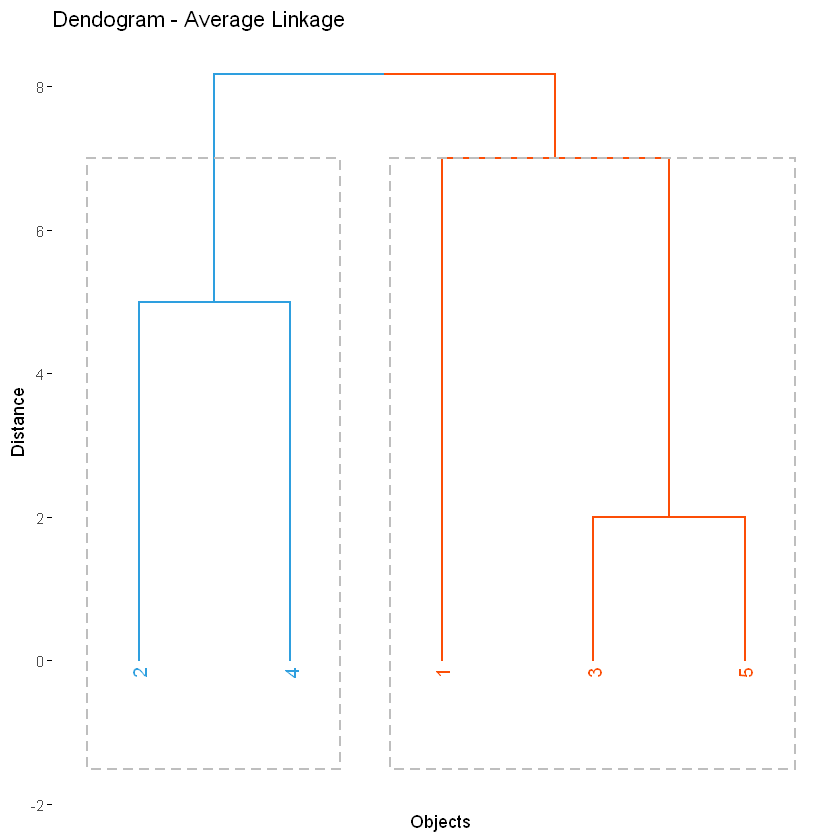

In [10]:
hc_data <- hclust(as.dist(D), method = "average")
fviz_dend(hc_data, cex = 0.8,
          main = "Dendogram - Average Linkage",
          k = 2,
          k_colors = c("#2E9FDF", "#FC4E07"),
          color_labels_by_k = T,
          rect = T,
          xlab = "Objects", ylab = "Distance", sub = "")

In [11]:
X_dat <- c(2, 1, 5, 8)

## a. Menghitung ESS
Untuk menghitung ESS, formula yang digunakan yaitu:
$$ESS = \sum_{j=1}^n (x_{j} - \bar{x})'(x_{j} - \bar{x})$$
Dengan menggunakan rumus tersebut, kita akan membuktikan jika nilai dari ESS dari data = 0.

In [12]:
x_bar <- colMeans(t(X_dat))
for(i in c(1:4)){
  print(sum(t(X_dat[i] - x_bar[i]) %*% (X_dat[i] - x_bar[i])))
}

[1] 0
[1] 0
[1] 0
[1] 0


Dari hasil di atas, terbukti bahwa ESS untuk klaster `{1}, {2}, {3}, dan {4}` semuanya bernilai 0.

## b. Menghitung ESS per klaster yang telah ditentukan pada soal

In [13]:
ess_13_2_4 <- ((X_dat[1] - mean(X_dat[c(1, 3)]))^2 + (X_dat[3] - mean(X_dat[c(1, 3)]))^2) + 
              (X_dat[2] - mean(X_dat[2]))^2 + (X_dat[4] - mean(X_dat[4]))^2

ess_14_2_3 <- ((X_dat[1] - mean(X_dat[c(1, 4)]))^2 + (X_dat[4] - mean(X_dat[c(1, 4)]))^2) + 
              (X_dat[2] - mean(X_dat[2]))^2 + (X_dat[3] - mean(X_dat[3]))^2

ess_1_23_4 <- (X_dat[1] - mean(X_dat[1]))^2 + ((X_dat[2] - mean(X_dat[c(2, 3)]))^2 + 
              (X_dat[3] - mean(X_dat[c(2, 3)]))^2) + (X_dat[4] - mean(X_dat[4]))^2

ess_1_24_3 <- (X_dat[1] - mean(X_dat[1]))^2 + ((X_dat[2] - mean(X_dat[c(2, 4)]))^2 + 
              (X_dat[4] - mean(X_dat[c(2, 4)]))^2) + (X_dat[3] - mean(X_dat[3]))^2

ess_1_2_34 <- (X_dat[1] - mean(X_dat[1]))^2 + (X_dat[2] - mean(X_dat[2]))^2 + 
              ((X_dat[3] - mean(X_dat[c(3, 4)]))^2 + (X_dat[4] - mean(X_dat[c(3, 4)]))^2)

ess <- rbind(ess_13_2_4, ess_14_2_3, ess_1_23_4, ess_1_24_3, ess_1_2_34)
ess

ess_13_2_4,4.5
ess_14_2_3,18.0
ess_1_23_4,8.0
ess_1_24_3,24.5
ess_1_2_34,4.5


In [14]:
## Increase ESS nya adalah:
ess_inc <- c()
ess_temp <- 5
for(i in c(1:5)){
  ess_temp <- ess[i] - ess_temp
  ess_inc <- append(ess_inc, ess_temp)
}
as.data.frame(ess_inc)

ess_inc
<dbl>
-0.5
18.5
-10.5
35.0
-30.5


## c. Membuat Dendogram dari Hasil Pengklasteran Pada Step Kedua

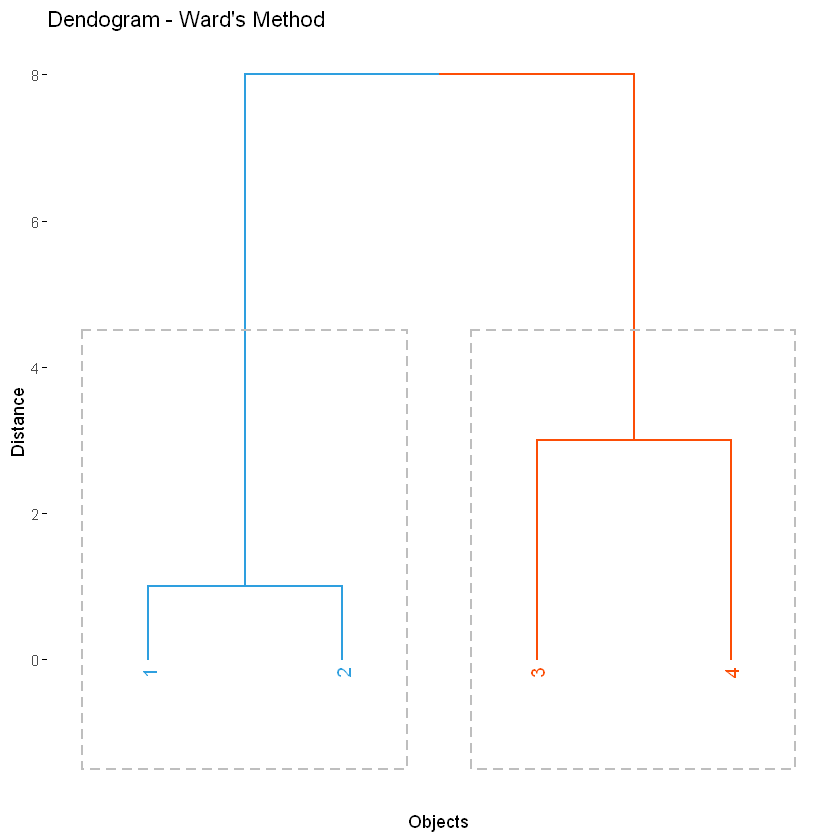

In [15]:
hc_ward <- hclust(dist(X_dat), method = "ward.D")
fviz_dend(hc_ward, cex = 0.8,
          main = "Dendogram - Ward's Method",
          k = 2,
          k_colors = c("#2E9FDF", "#FC4E07"),
          color_labels_by_k = T,
          rect = T,
          xlab = "Objects", ylab = "Distance", sub = "")

# 12.12

In [16]:
#items <- c("A", "B", "C", "D")
x1 <- c(5, -1, 1, -3)
x2 <- c(3, 1, -2, -2)
obs <- cbind(as.numeric(x1), as.numeric(x2))
as.data.frame(obs)
str(obs)

V1,V2
<dbl>,<dbl>
5,3
-1,1
1,-2
-3,-2


 num [1:4, 1:2] 5 -1 1 -3 3 1 -2 -2


Selanjutnya, kita akan menghitung inisialisasi dari centroid cluster yang akan dibangung dengan kombinasi pengelompokan $(AC)$ dan $(BD)$

In [17]:
AC_xbar1 <- (obs[1, 1] + obs[3, 1])/2
AC_xbar2 <- (obs[1, 2] + obs[3, 2])/2
BD_xbar1 <- (obs[2, 1] + obs[4, 1])/2
BD_xbar2 <- (obs[2, 2] + obs[4, 2])/2

cent <- matrix(c(AC_xbar1, BD_xbar1, AC_xbar2, BD_xbar2), nrow = 2, ncol = 2)
colnames(cent) <- c("xbar1", "xbar2")
rownames(cent) <- c("(AC)", "(BD)")
cent

,xbar1,xbar2
(AC),3,0.5
(BD),-2,-0.5


Selanjutnya, kita akan menghitung jarak antara titik A dan B ke centroid yang telah dihitung sebelumnya menggunakan metode Eucledian Distance:

In [18]:
d2_A_AC <- (obs[1, 1] - cent[1, 1])^2  + (obs[1, 2] - cent[1, 2])^2
d2_A_BD <- (obs[1, 1] - cent[2, 1])^2  + (obs[1, 2] - cent[2, 2])^2
d2_B_AC <- (obs[2, 1] - cent[1, 1])^2  + (obs[2, 2] - cent[1, 2])^2
d2_B_BD <- (obs[2, 1] - cent[2, 1])^2  + (obs[2, 2] - cent[2, 2])^2

rbind(d2_A_AC, d2_A_BD, d2_B_AC, d2_B_BD)

d2_A_AC,10.25
d2_A_BD,61.25
d2_B_AC,16.25
d2_B_BD,3.25


Dari hasil di atas, dapat kita lihat bahwa jarak terkecil diperoleh dari jarak antara titik B dengan centroid (AC), sehingga klaster baru yang terbentuk adalah klaster $(ABC)$, dengan koordinat centroidnya:

In [19]:
ABC_xbar1 <- (obs[1, 1] + obs[2, 1] + obs[3, 1])/3
ABC_xbar2 <- (obs[1, 2] + obs[2, 2] + obs[3, 2])/3

cent_new <- matrix(c(ABC_xbar1, obs[4, 1], ABC_xbar2, obs[4, 2]), nrow = 2, ncol = 2)
colnames(cent_new) <- c("xbar1", "xbar2")
rownames(cent_new) <- c("(ABC)", "D")
cent_new

,xbar1,xbar2
(ABC),1.666667,0.6666667
D,-3.000000,-2.0000000


Lalu, kita akan menghitung jarak antara centroid baru dengan semua observasi dari data:

In [20]:
obs

5,3
-1,1
1,-2
-3,-2


In [21]:
d2_ABC_A <- (obs[1, 1] - cent_new[1, 1])^2 + (obs[1, 2] - cent_new[1, 2])^2
d2_ABC_B <- (obs[2, 1] - cent_new[1, 1])^2 + (obs[2, 2] - cent_new[1, 2])^2
d2_ABC_C <- (obs[3, 1] - cent_new[1, 1])^2 + (obs[3, 2] - cent_new[1, 2])^2
d2_ABC_D <- (obs[4, 1] - cent_new[1, 1])^2 + (obs[4, 2] - cent_new[1, 2])^2

d2_D_A <- (obs[1, 1] - cent_new[2, 1])^2 + (obs[1, 2] - cent_new[2, 2])^2
d2_D_B <- (obs[2, 1] - cent_new[2, 1])^2 + (obs[2, 2] - cent_new[2, 2])^2
d2_D_C <- (obs[3, 1] - cent_new[2, 1])^2 + (obs[3, 2] - cent_new[2, 2])^2
d2_D_D <- (obs[4, 1] - cent_new[2, 1])^2 + (obs[4, 2] - cent_new[2, 2])^2

d2_ABC <- cbind(d2_ABC_A, d2_ABC_B, d2_ABC_C, d2_ABC_D)
d2_D <- cbind(d2_D_A, d2_D_B, d2_D_C, d2_D_D)
rbind(d2_ABC, d2_D)

d2_ABC_A,d2_ABC_B,d2_ABC_C,d2_ABC_D
16.55556,7.222222,7.555556,28.88889
89.00000,13.000000,16.000000,0.00000


Jika kita melihat dari hasil matriks jarak antara observasi dengan centroid dari setiap cluster yang akan dibentuk, jika dibandingkan dengan hasil dari Example 12.12, kedua hasil tersebut memiliki sisi positif dan negatif nya sendiri. Misal jarak antara observasi dengan centroid A (dari hasil Example 12.12) yang nilainya itu cenderung lebih besar dibanding jarak antara observasi dengan centroid D (dari hasil pada soal ini). Tetapi sebaliknya, jarak antara observasi dengan centroid (BCD) (dari hasil Example 12.12) nilainya cenderung lebih kecil dibanding dengan jarak antara observasi dengan centroid (ABC) (dari hasil pada soal ini). \
Dari hasil tersebut, untuk pemilihan pembentukan cluster nya, tergantung dari subjektifitas dan objektifitas dari peneliti sendiri, ingin memilih pembentukan cluster dengan centroid jenis apa. Hal yang perlu dipertimbangkan adalah dengan penggunaan centroid yang dipilih dalam pembentukan cluster, peneliti harus melihat dari sisi jarak dan juga sisi ketumpangtindihan cluster yang dibentuk dari centroid tersebut, agar hasil cluster lebih baik dan informasi yang didapatkan lebih optimal.

# 12.16

In [22]:
nat_rec <- read.xlsx("National Track Records for Women.xlsx")

for(i in c(2:8)){
  nat_rec[, i] <- as.numeric(nat_rec[, i])
}

## a. Menghitung Matriks Distance dengan Euclidian

In [23]:
D_nat_rec <- dist(nat_rec[, c(2:8)])

## b. Membuat Hierarchical Cluster dengan Metode Single Linkage dan Complete Linkage

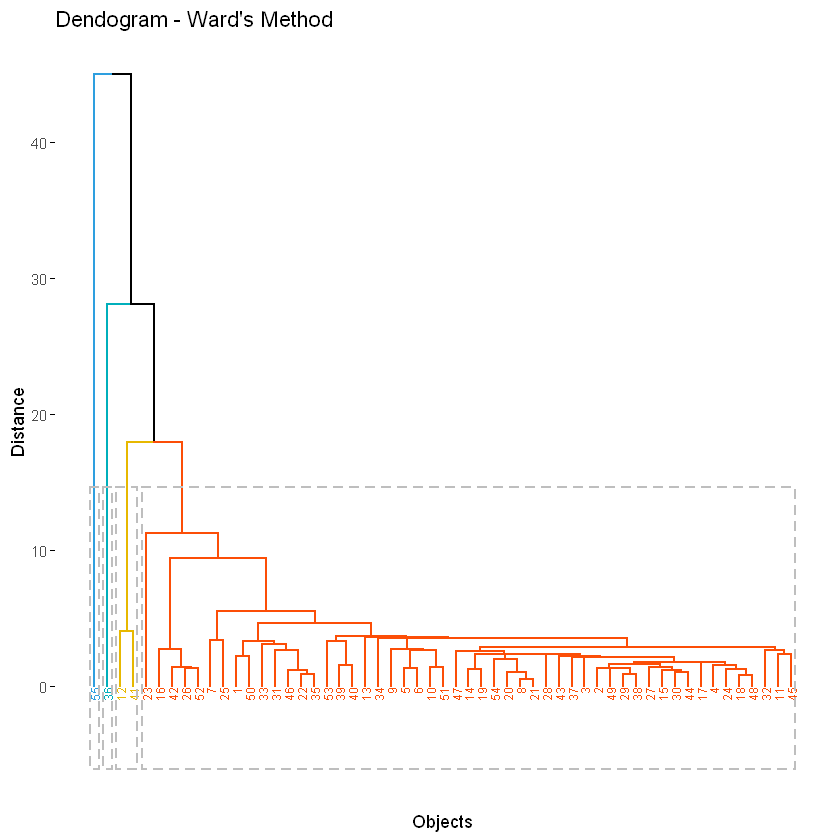

In [24]:
hc_single <- hclust(D_nat_rec, method = "single")
fviz_dend(hc_single, cex = 0.5,
          k = 4,
          k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
          color_labels_by_k = T,
          rect = T,
          main = "Dendogram - Ward's Method",
          xlab = "Objects", ylab = "Distance", sub = "")

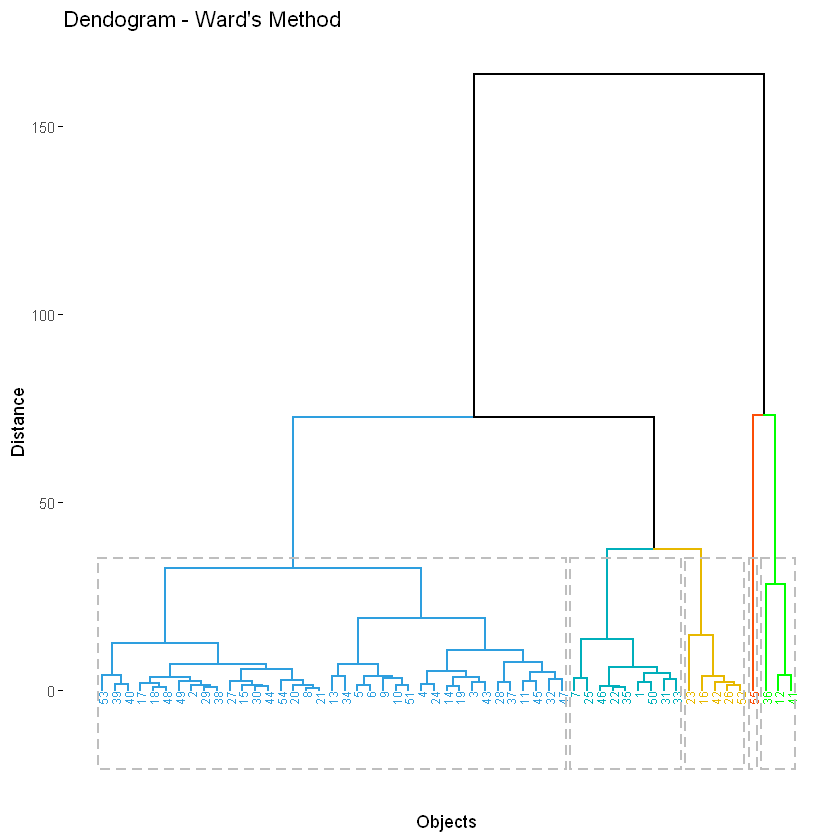

In [25]:
hc_complete <- hclust(D_nat_rec, method = "complete")
fviz_dend(hc_complete, cex = 0.5,
          k = 5,
          k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07", "#00ff00"),
          color_labels_by_k = T,
          rect = T,
          main = "Dendogram - Ward's Method",
          xlab = "Objects", ylab = "Distance", sub = "")

In [26]:
## c. Membuat Non-Hierarchical Cluster dengan K-Means Method

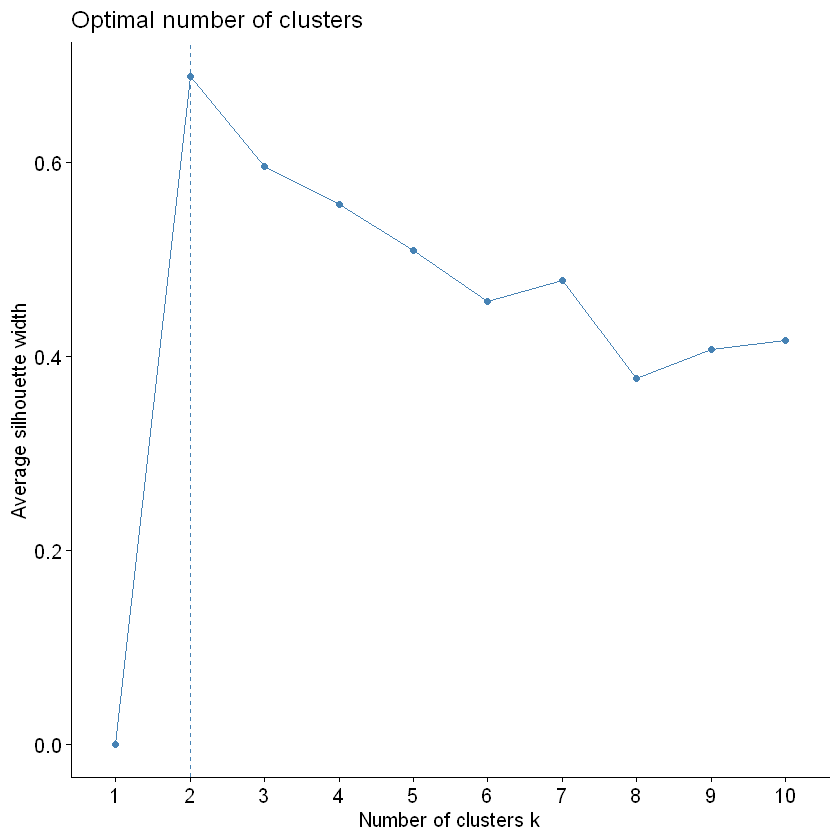

In [27]:
fviz_nbclust(nat_rec[, c(2:8)], kmeans)

Dari diagram di atas, kita bisa menentukan kandidat jumlah klaster yang bisa kita bentuk dari data yang digunakan, yaitu antara 4 klaster dan 6 klaster.

- Untuk 4 klaster:

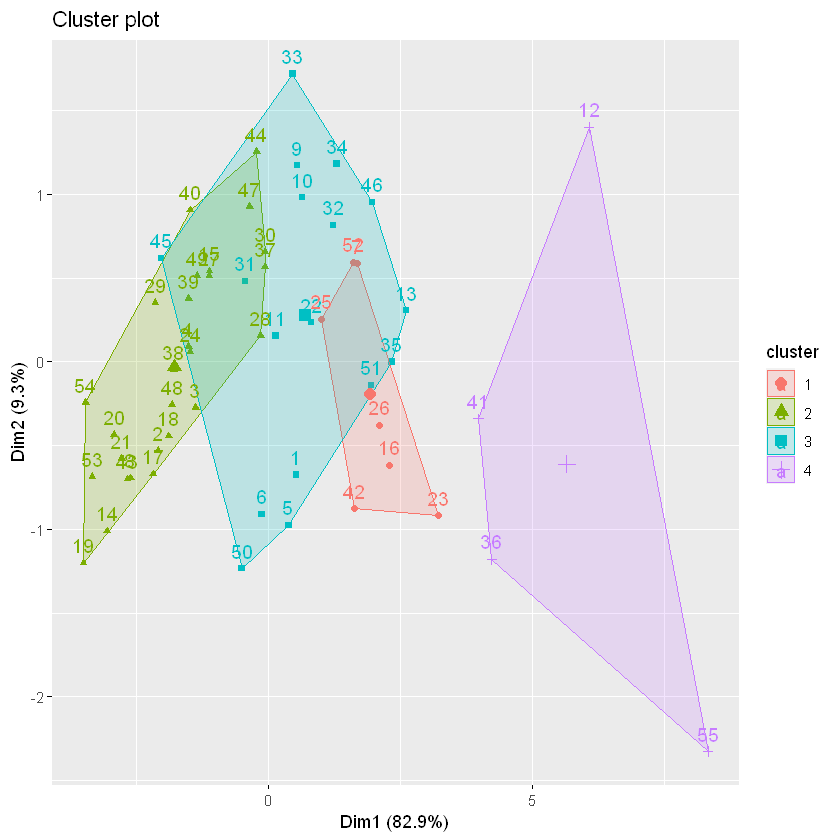

In [28]:
km_nat_rec <- kmeans(nat_rec[, c(2:8)], centers = 4)
fviz_cluster(km_nat_rec, data = as.data.frame(nat_rec[, c(2:8)]))

- Untuk 6 klaster:

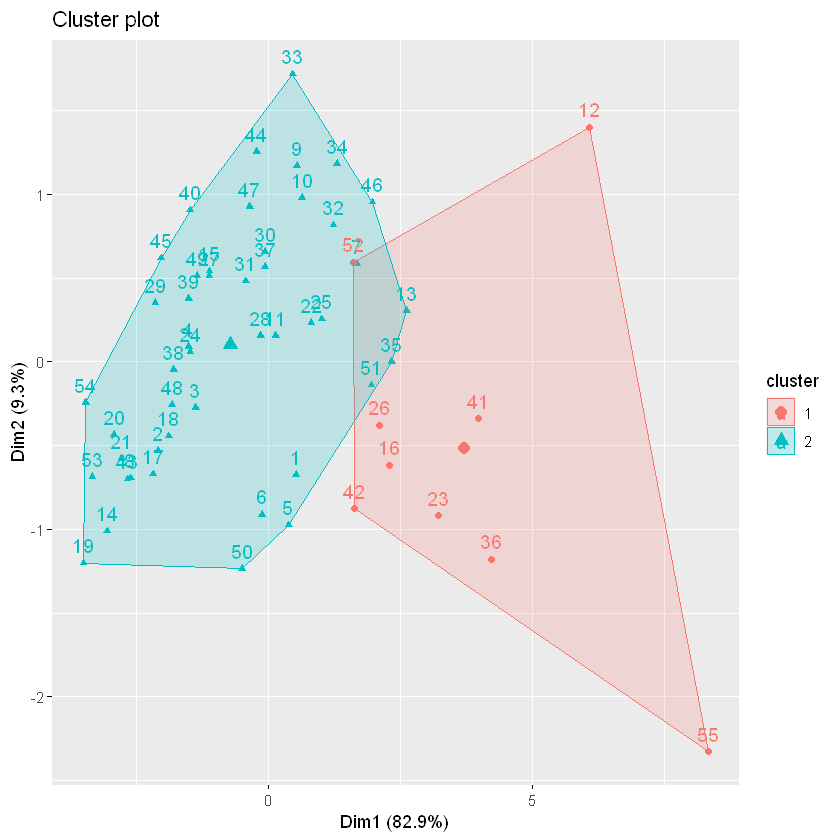

In [29]:
km_nat_rec <- kmeans(nat_rec[, c(2:8)], centers = 2)#, nstart = 25)
fviz_cluster(km_nat_rec, data = as.data.frame(nat_rec[, c(2:8)]))